In [43]:
import hiddenlayer as hl
import torch
from models import RNN_Net
from tensorboardX import SummaryWriter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Hiddenlayer 可视化

In [44]:
model = RNN_Net(5, 15, 5, rnn_type='LSTM', num_layers=1)

In [45]:
tsfm = [hl.transforms.Rename(op='prim::PythonOp', to = 'LSTM')]

d:\softwares\miniconda\envs\torch36\lib\site-packages\torch\onnx\symbolic.py:69: UserWarning: ONNX export failed on RNN/GRU/LSTM because batch_first not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")


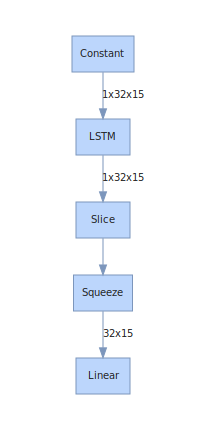

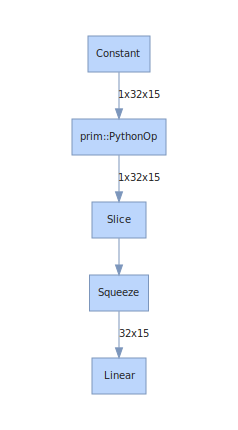

In [47]:
hl_graph = hl.build_graph(model, torch.zeros([32, 20, 5]), transforms=tsfm)
h2_graph = hl.build_graph(model, torch.zeros([32, 20, 5]))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
h2_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph
h2_graph

## TensorBoardX 可视化

In [38]:
dummy_input = torch.zeros([8, 20, 5])
out = model(dummy_input)
out

tensor([[-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906],
        [-0.1660, -0.2287,  0.1846, -0.2513,  0.0906]],
       grad_fn=<ThAddmmBackward>)

In [39]:
with SummaryWriter(comment='RNN') as write:
    write.add_graph(model, (dummy_input,))

TypeError: __ne__(): incompatible function arguments. The following argument types are supported:
    1. (self: torch._C._onnx.OperatorExportTypes, arg0: torch._C._onnx.OperatorExportTypes) -> bool

Invoked with: OperatorExportTypes.RAW, False